# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored and if there was a success (the target variable). For the whole database considered, there were 6499 successes (8% success rate).


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import numpy as np # linear algebra
import pandas as pd # pandas 

# Plot tools 
import matplotlib.pyplot as plt # matplotlib
import seaborn as sns # seaborn 
import plotly.express as px # plotly
from plotly.subplots import make_subplots
pd.set_option('display.max_columns', None)

# For modeling and running regressions 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Classification packages 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score,mean_squared_error,classification_report,roc_curve,auc,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [7]:
df = pd.read_csv('/Users/jaikumar/Desktop/Berkeley_ML/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

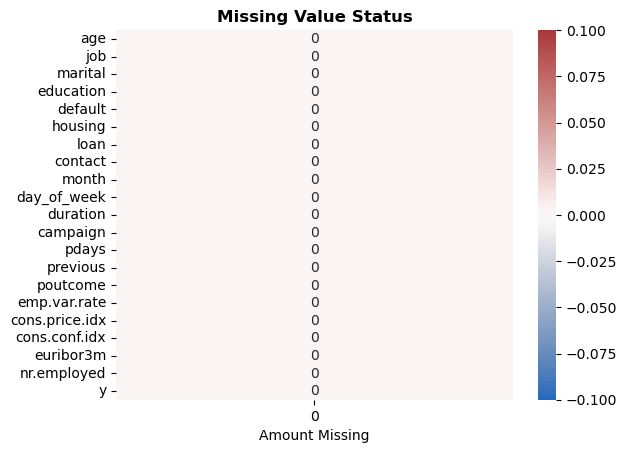

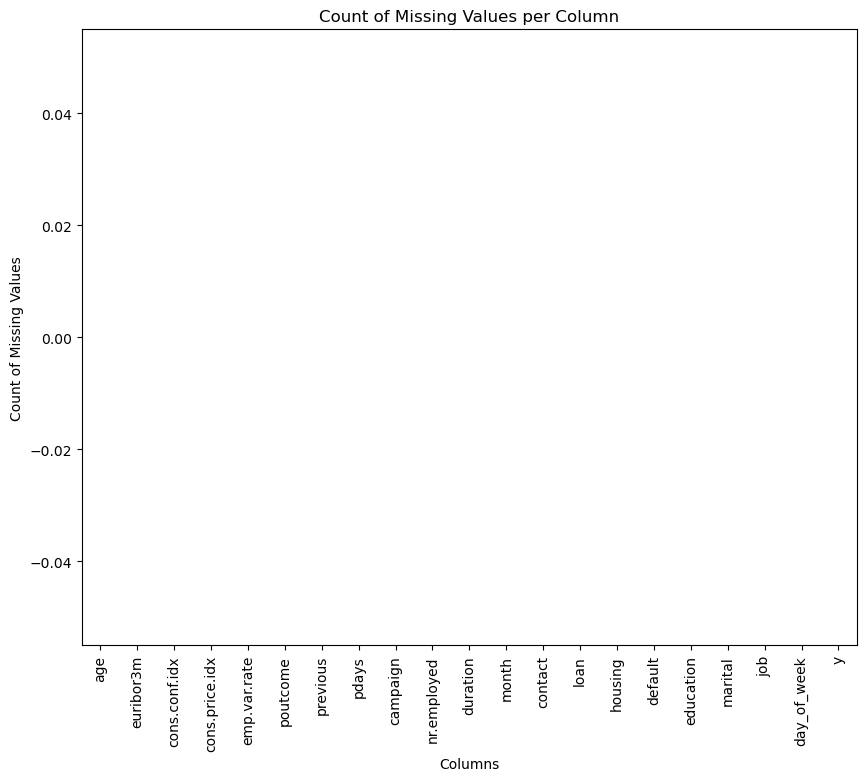

In [10]:
# Display basic information about the dataset for EDA
print(df.head())
print(df.info())
print(df.describe().T)
print(df.describe(include="object").T)

# Data Understanding and Analysis - Check for missing values
print('-'*50)
print(' '*20,'Data Missing counts')
print('-'*50,'\n')
print(df.isna().sum())

plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

# Data Cleanup - Check for other missing values
missing_counts = df.isnull().sum()

# 2. Sort the counts
sorted_counts = missing_counts.sort_values()

# 3. Create the bar plot
plt.figure(figsize=(10, 8))
sorted_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values per Column')
plt.show()


The Data does not have any missing value. that said we do have data types that needs to be encoded for our Analysis, both on the Exploration as well as the classification side for the CRISP-DM framework. 


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [13]:
df.info()
print (df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
# we are finding the percentage of each class in the feature 'y'
class_values = (df['y'].value_counts()/df['y'].value_counts().sum())*100
print(class_values)

y
no     88.734583
yes    11.265417
Name: count, dtype: float64


We see a ~90:10 split on the class values which indicates a Class imbalance. A class distribution of 80:20 or greater is typically considered as an imbalance for a binary classification. To remove bias and poor classification of minority classes, we need to identify & deal with class imbalance.

In [16]:
# Checking count of unique values of each columns 
for col in df:
    print(f"{col}: {df[col].nunique()}")

# checking unique values for each categorical data 
columns = df.columns
num_columns = df._get_numeric_data().columns
list(set(columns) - set(num_columns))

age: 78
job: 12
marital: 4
education: 8
default: 3
housing: 3
loan: 3
contact: 2
month: 10
day_of_week: 5
duration: 1544
campaign: 42
pdays: 27
previous: 8
poutcome: 3
emp.var.rate: 10
cons.price.idx: 26
cons.conf.idx: 26
euribor3m: 316
nr.employed: 11
y: 2


['contact',
 'education',
 'month',
 'loan',
 'poutcome',
 'y',
 'default',
 'marital',
 'day_of_week',
 'job',
 'housing']

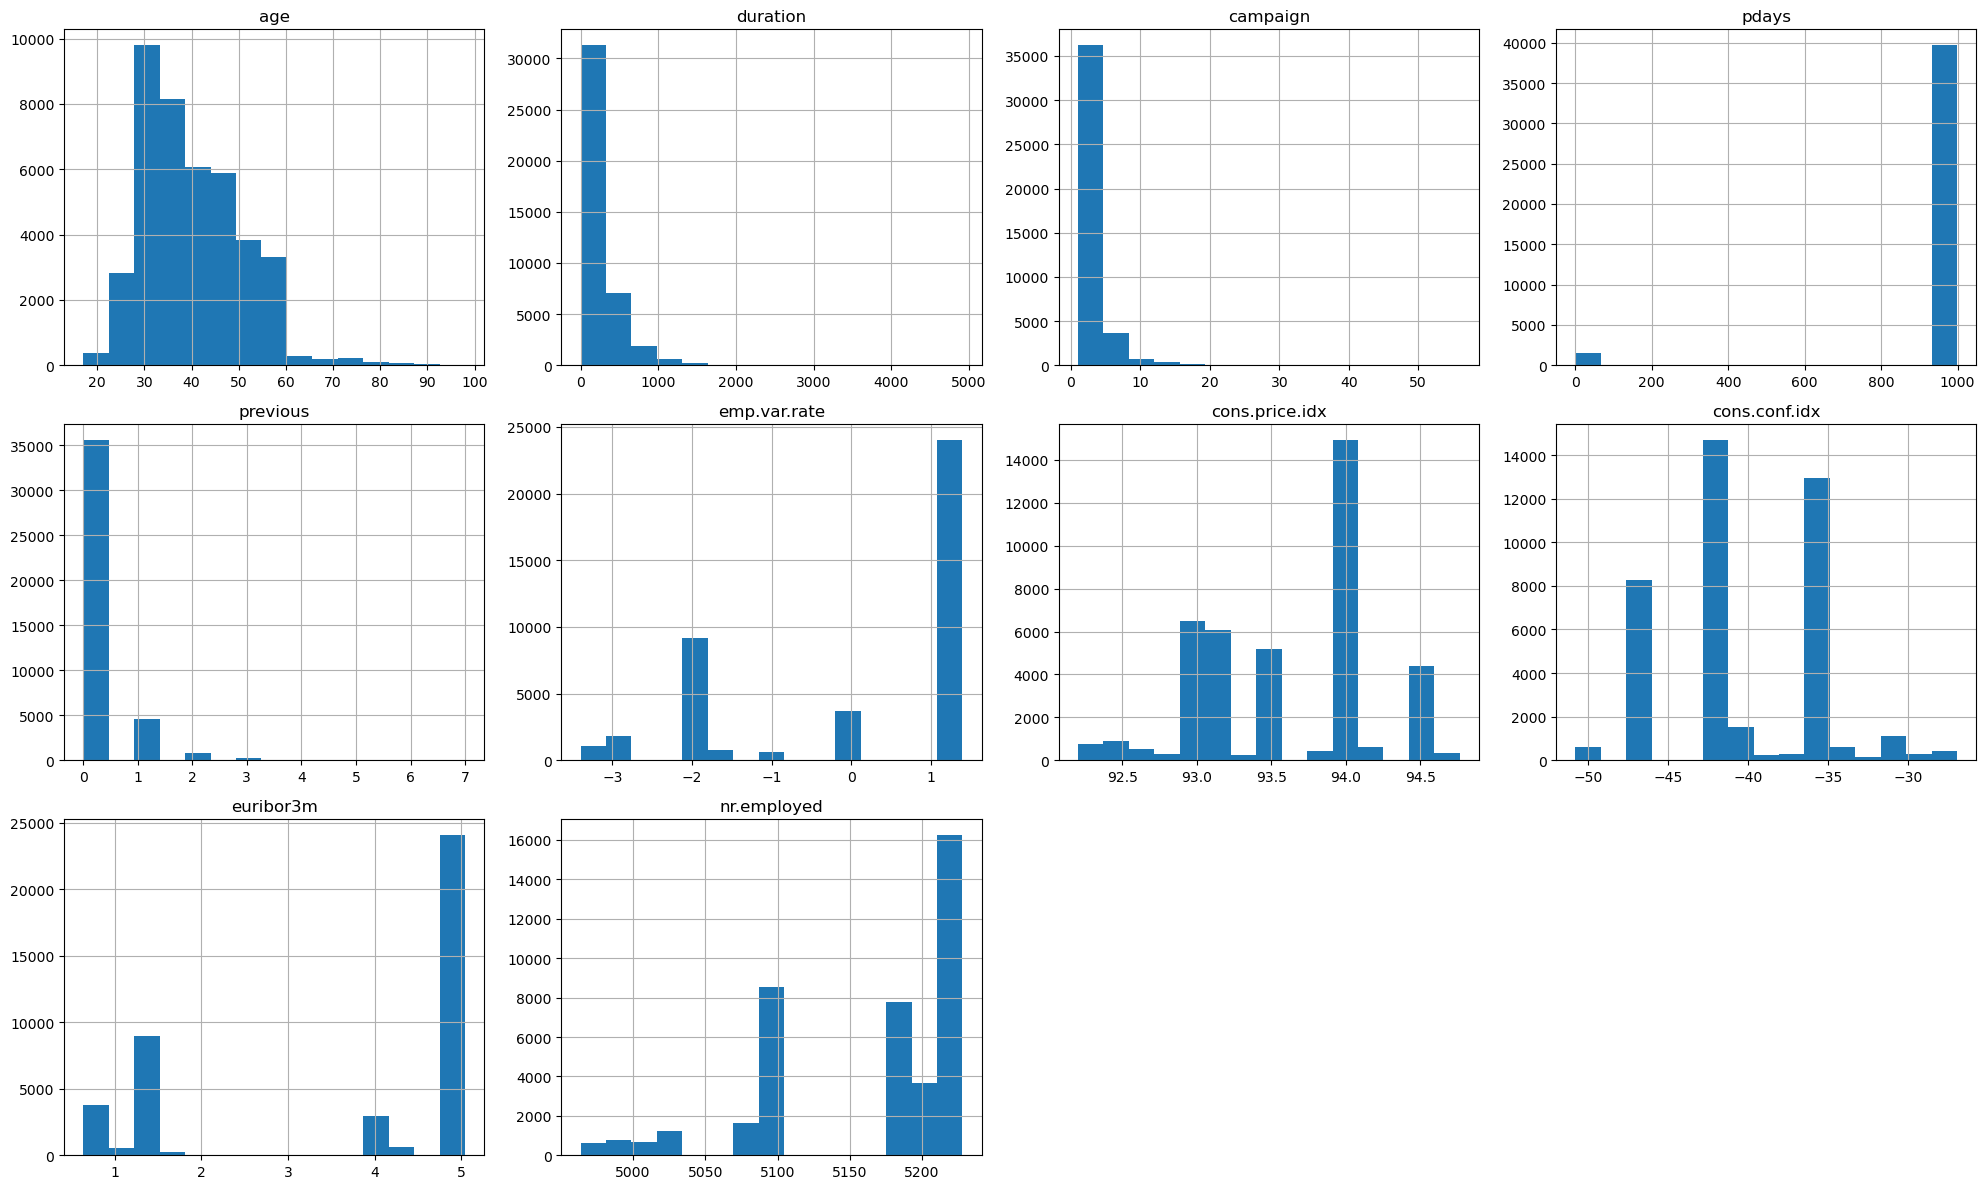

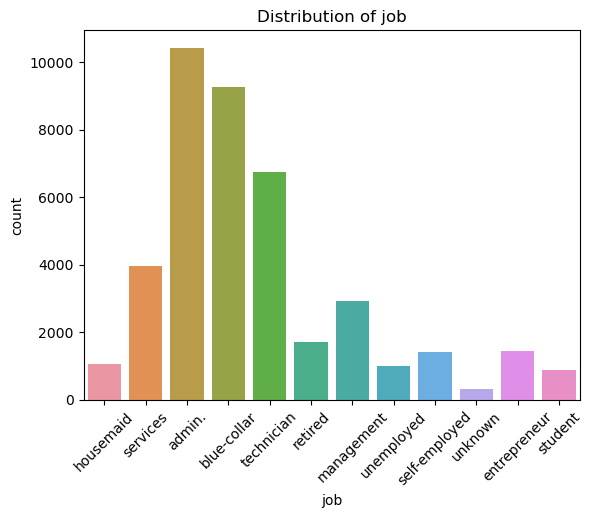

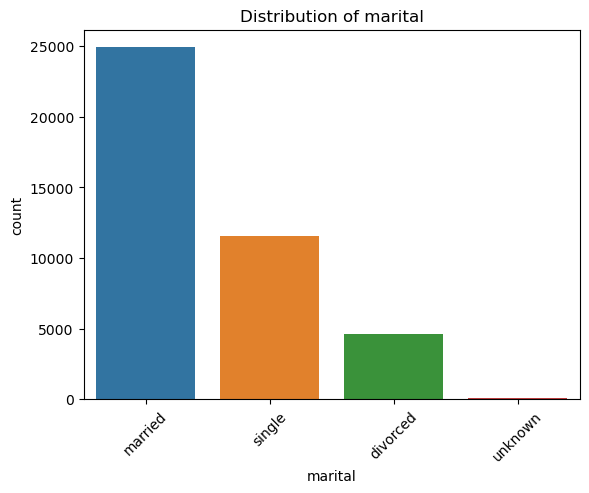

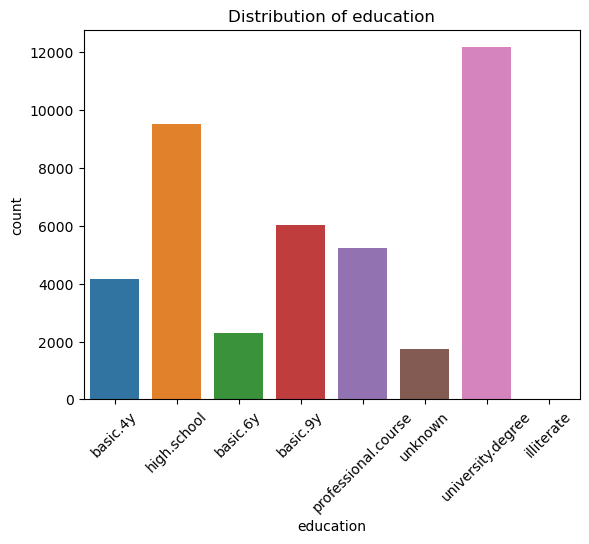

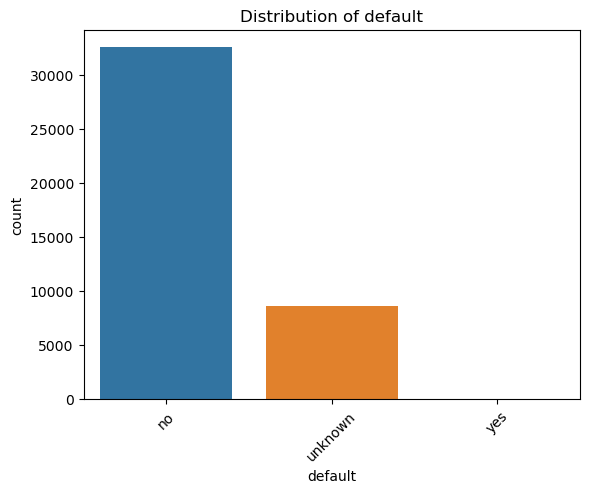

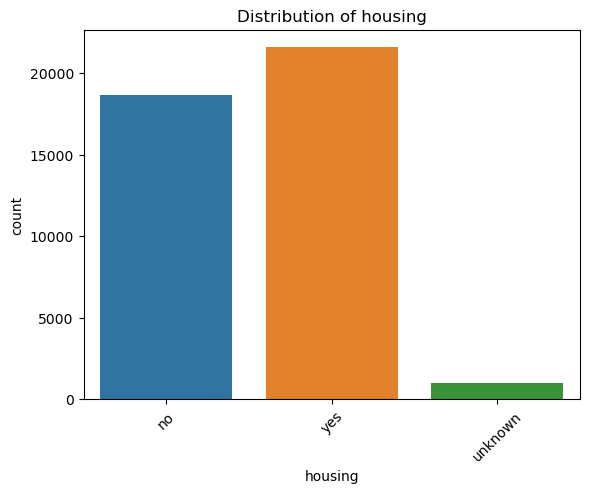

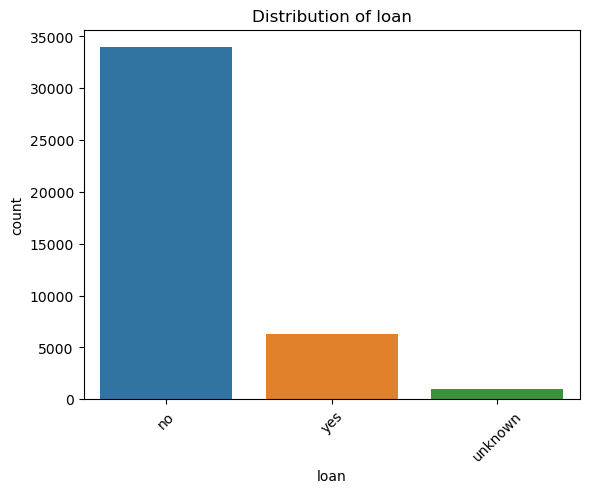

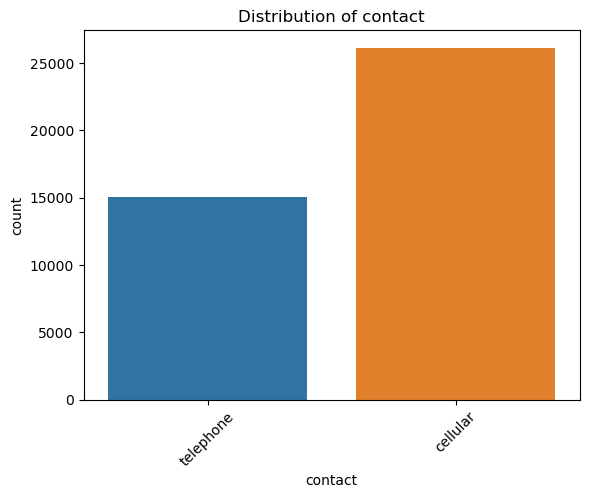

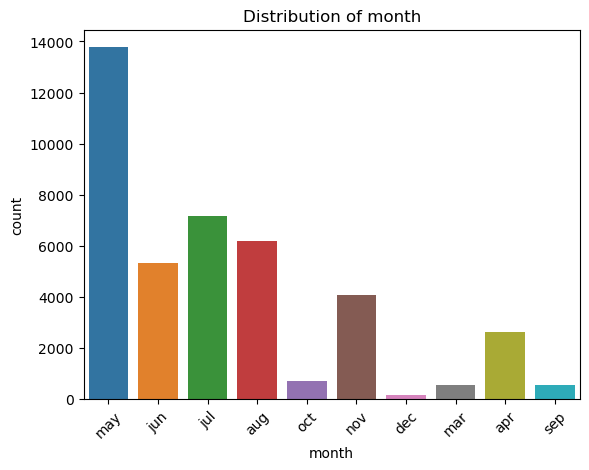

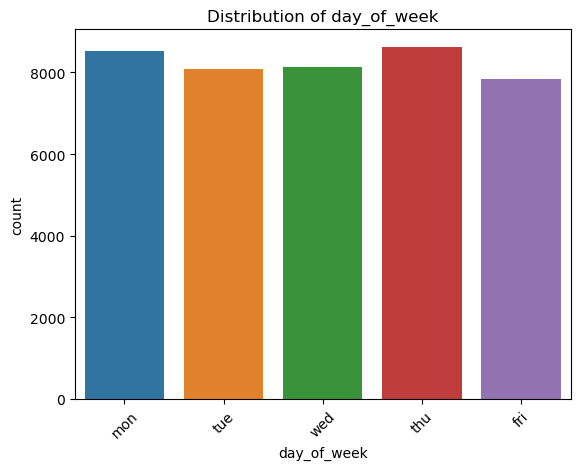

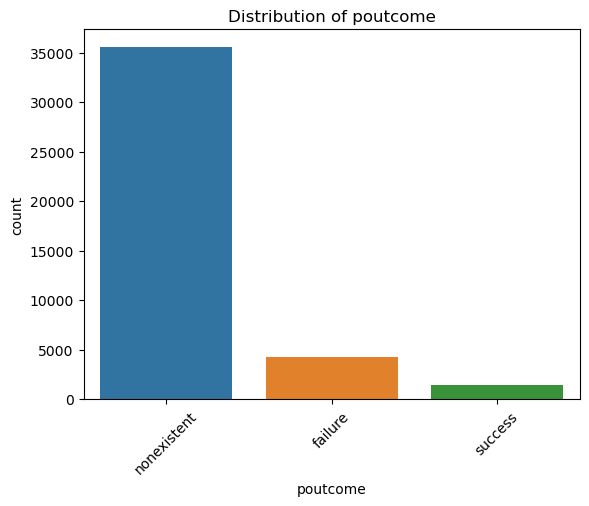

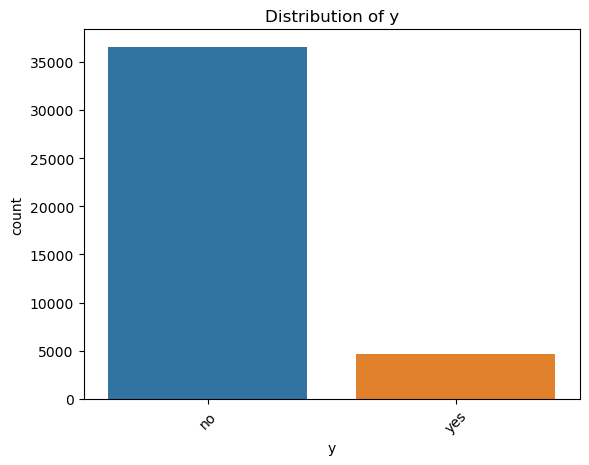

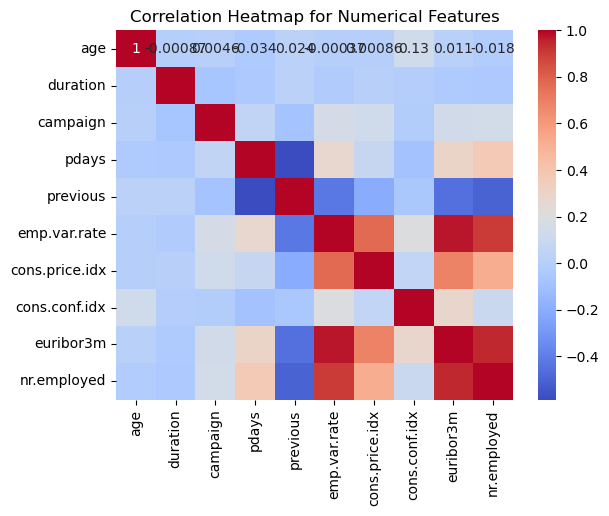

In [17]:
# Plotting histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
num_rows = int(len(numerical_features) / 4) + (len(numerical_features) % 4 > 0)
df[numerical_features].hist(bins=15, figsize=(20, num_rows * 4), layout=(num_rows, 4))
plt.tight_layout()
plt.show()

# Plotting count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap for numerical features
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()
   

From the plots we see 
1. The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.
2. A high of the customers are married.
3. Majority of the customers do not have a default
4. Many of our past customers have applied for a housing loan but very few have applied for personal loans.
5. Cell-phones seem to be the most favoured method of reaching out to customers.
6. Many customers have been contacted in the month of May. prefer to be contacted on "thursday"
7. The plot for the target variable shows heavy imbalance in the target variable.
The missing values in some columns have been represented as unknown. unknown represents missing data.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/var/folders/yd/dn382m1d76x43r00z5sdcptr0000gn/T/ipykernel_51256/1995907126.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], ax = ax2)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers
Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %
MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


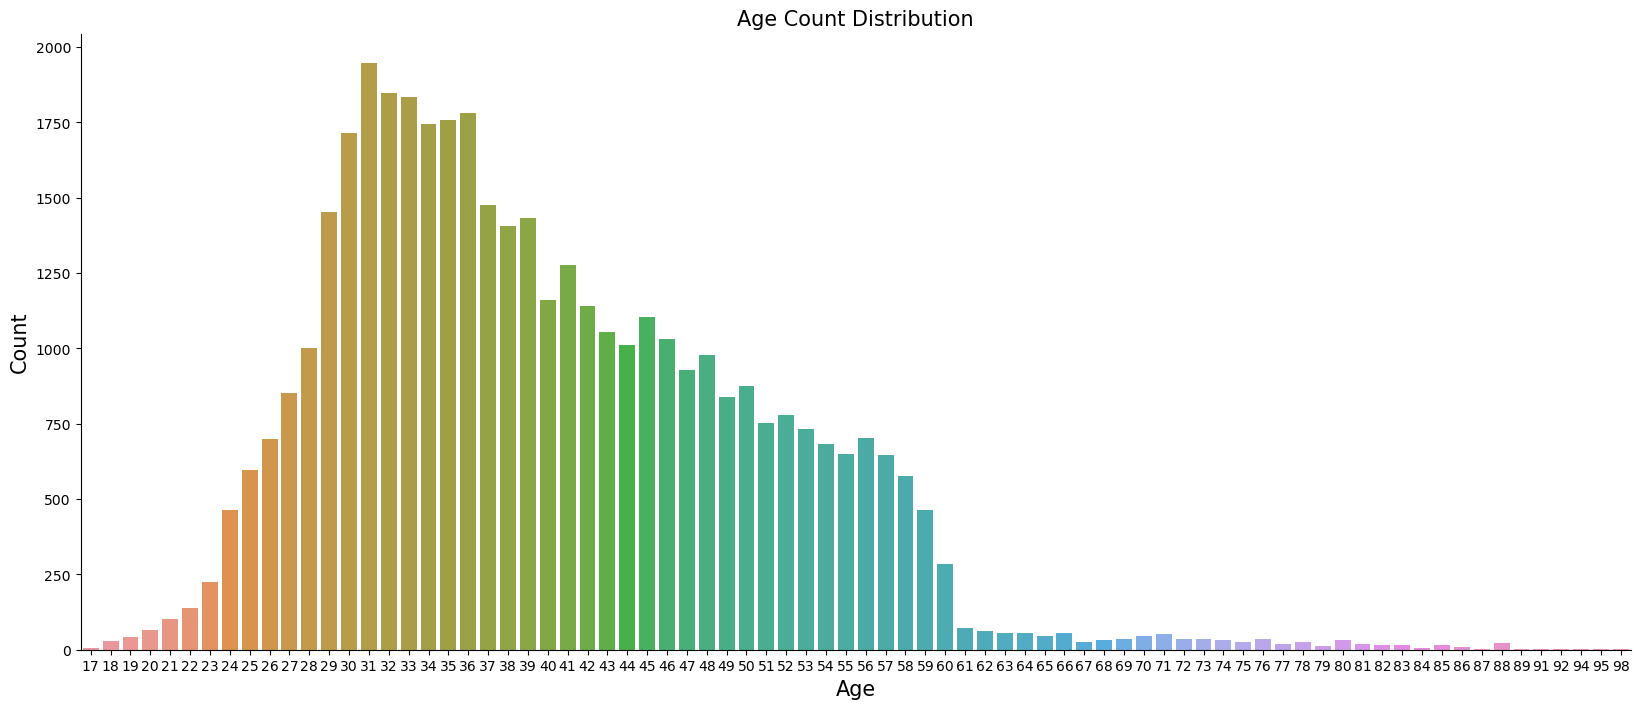

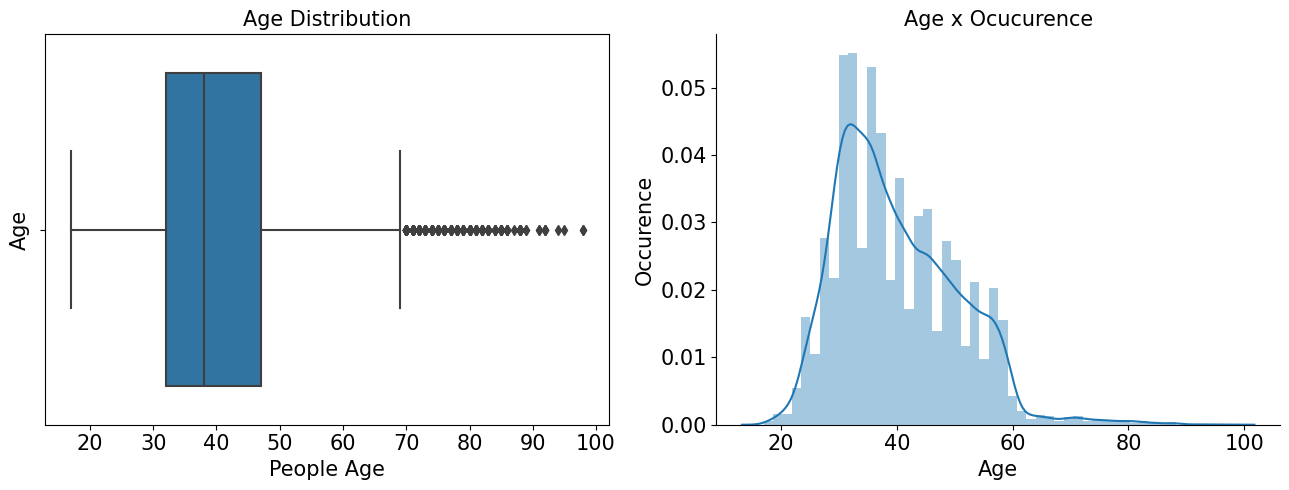

In [19]:
# Outlier Cleanup
# Look at "age" - and see if this is a main factor on the loan application output
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine() 

# Look at the Distribution and impact on "Y" outcome 
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

# Look at the outliers in the AGE category using Quartiles
print('1º Quartile: ', df['age'].quantile(q = 0.25))
print('2º Quartile: ', df['age'].quantile(q = 0.50))
print('3º Quartile: ', df['age'].quantile(q = 0.75))
print('4º Quartile: ', df['age'].quantile(q = 1.00))

print('Ages above: ', df['age'].quantile(q = 0.75) + 
                      1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'are outliers')

print('Numerber of outliers: ', df[df['age'] > 69.6]['age'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['age'] > 69.6]['age'].count()*100/len(df),2), '%')

# Calculating somean for Age 
print('MEAN:', round(df['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(df['age'].std(), 1))
# look at the CV (coefficient variation) (STD/MEAN)*100
print('CV  :',round(df['age'].std()*100/df['age'].mean(), 1), ', High middle dispersion')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/var/folders/yd/dn382m1d76x43r00z5sdcptr0000gn/T/ipykernel_51256/2249113109.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'], ax = ax2)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration above:  644.5 are outliers
Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %
MEAN: 258.3
STD : 259.3
CV  : 100.4 , High middle dispersion


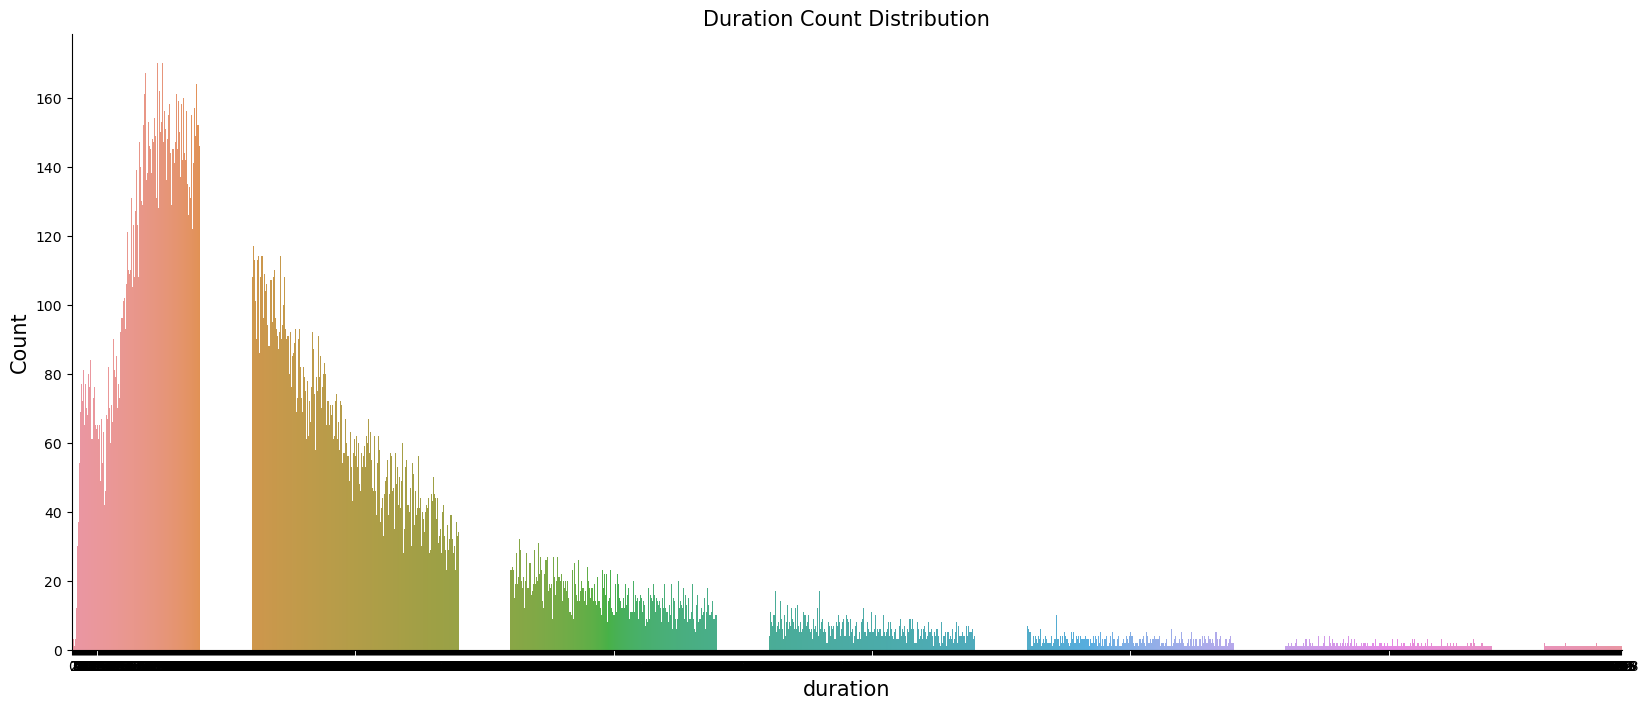

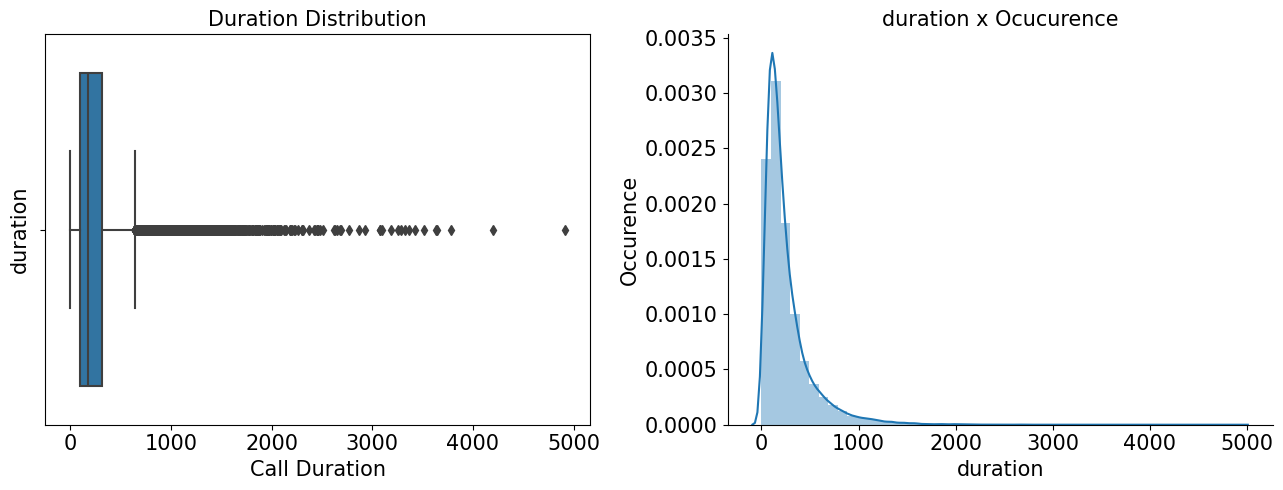

In [20]:
# Look at duration (last contact) - and see if this is a main factor on the loan application output
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'duration', data = df)
ax.set_xlabel('duration', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Count Distribution', fontsize=15)
sns.despine() 

# Look at the Distribution and impact on "Y" outcome 
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Call Duration', fontsize=15)
ax1.set_ylabel('duration', fontsize=15)
ax1.set_title('Duration Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('duration', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('duration x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

# Look at the outliers in the duration category using Quartiles
print('1º Quartile: ', df['duration'].quantile(q = 0.25))
print('2º Quartile: ', df['duration'].quantile(q = 0.50))
print('3º Quartile: ', df['duration'].quantile(q = 0.75))
print('4º Quartile: ', df['duration'].quantile(q = 1.00))

print('Duration above: ', df['duration'].quantile(q = 0.75) + 
                      1.5*(df['duration'].quantile(q = 0.75) - df['duration'].quantile(q = 0.25)), 'are outliers')

print('Numerber of outliers: ', df[df['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['duration'] > 644.5]['duration'].count()*100/len(df),2), '%')

# Calculating somean for Age 
print('MEAN:', round(df['duration'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(df['duration'].std(), 1))
# look at the CV (coefficient variation) (STD/MEAN)*100
print('CV  :',round(df['duration'].std()*100/df['duration'].mean(), 1), ', High middle dispersion')

Seems like "age" has a high Coeffecient variation of dispersion with a mean close to 40 years. I dont see a clear conclusion if it has any high correlation to Y (outcome).
"duration" also has a high Coeffecient variation with a mean close to 258.3. It does show correlation with the outcome which needs to be verified. 

In [22]:
print('Default:\n No credit in default:'     , df[df['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', df[df['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , df[df['default'] == 'yes']    ['age'].count())

print('Housing:\n No housing in loan:'     , df[df['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', df[df['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , df[df['housing'] == 'yes']    ['age'].count())

print('Housing:\n No to personal loan:'     , df[df['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', df[df['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , df[df['loan'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3
Housing:
 No housing in loan: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576
Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


With the Default, Loan and Housing, I dont see a real correlation on the outcome (Y), but it does help us see the distribution of people in these categories and seems like Housing loans do have higher probability of occurance.

In [24]:
# Imputing missing unkown values on categorical data with "mode"
categorical_col = df.select_dtypes(include=['object']).columns
for column in categorical_col:
    mode = df[column].mode()[0]
    df[column] = df[column].replace('unknown',mode)

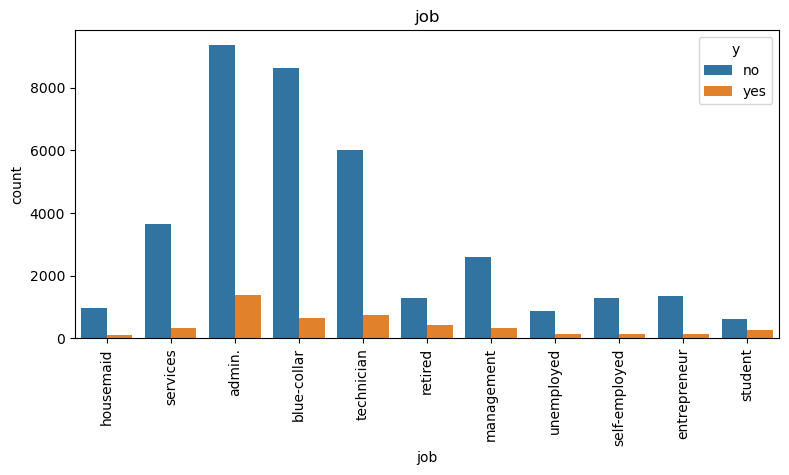

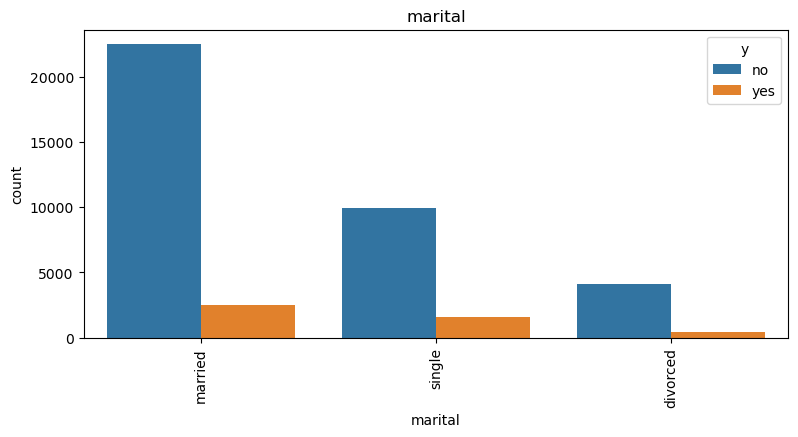

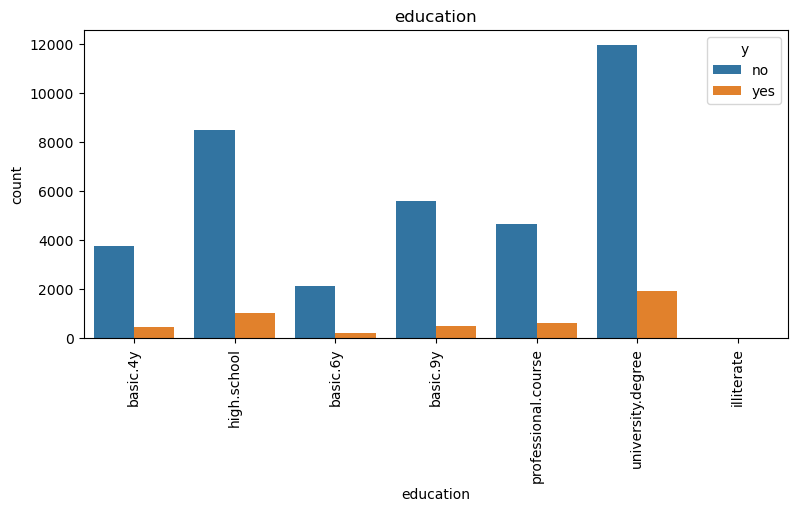

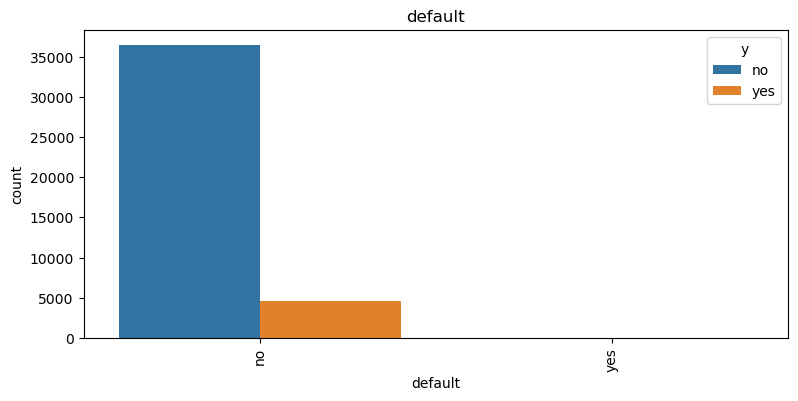

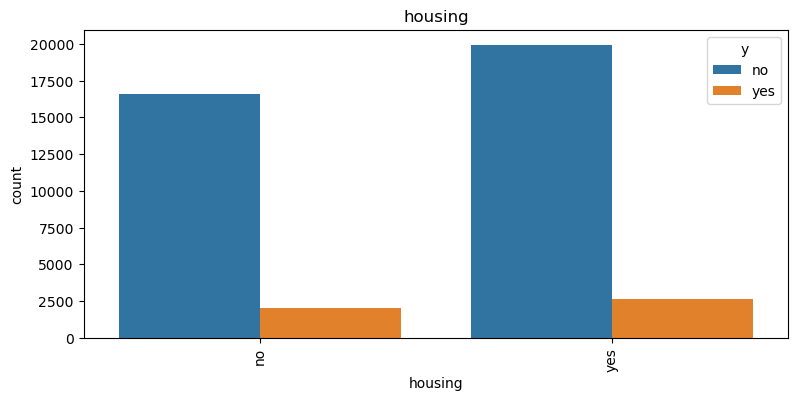

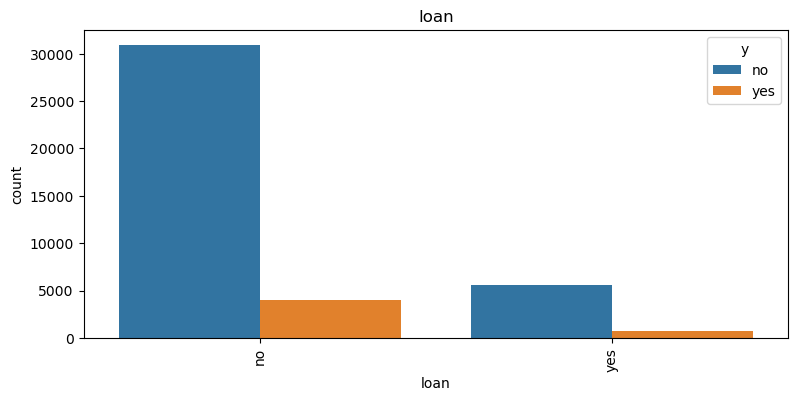

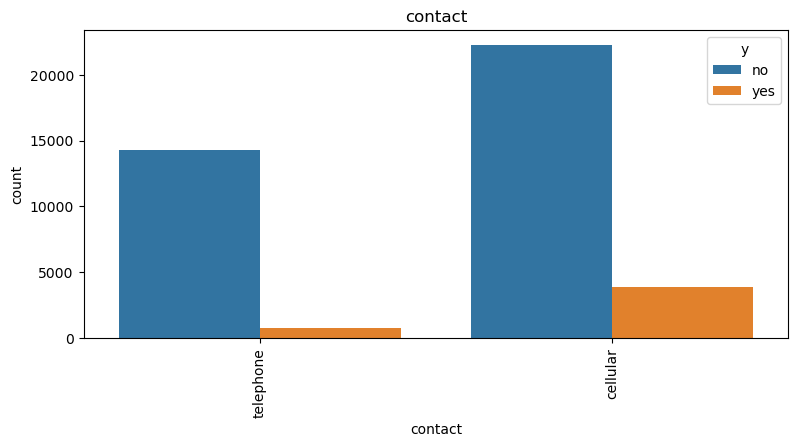

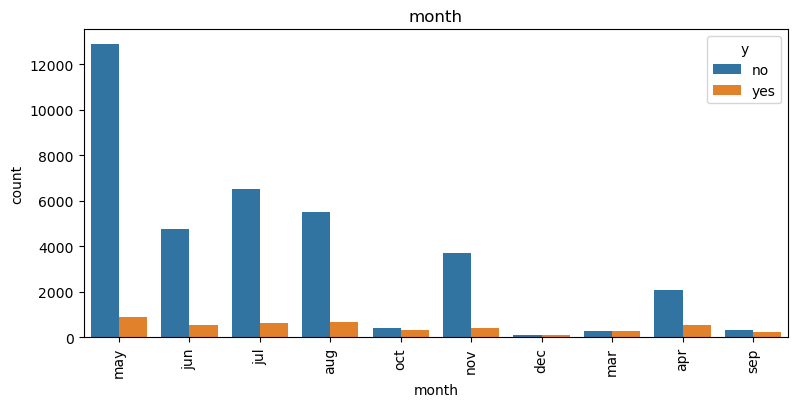

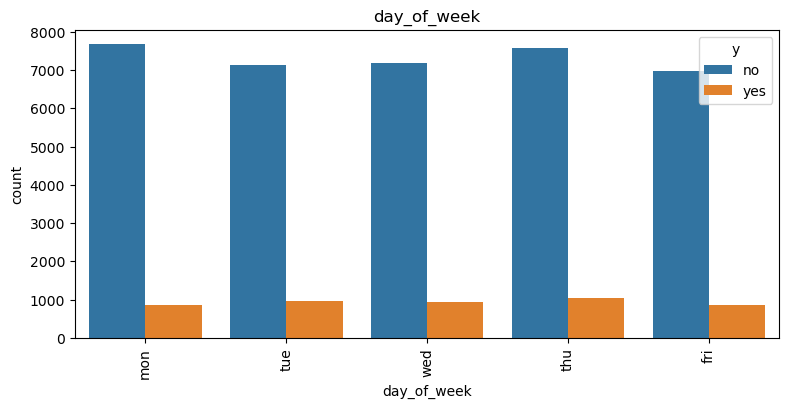

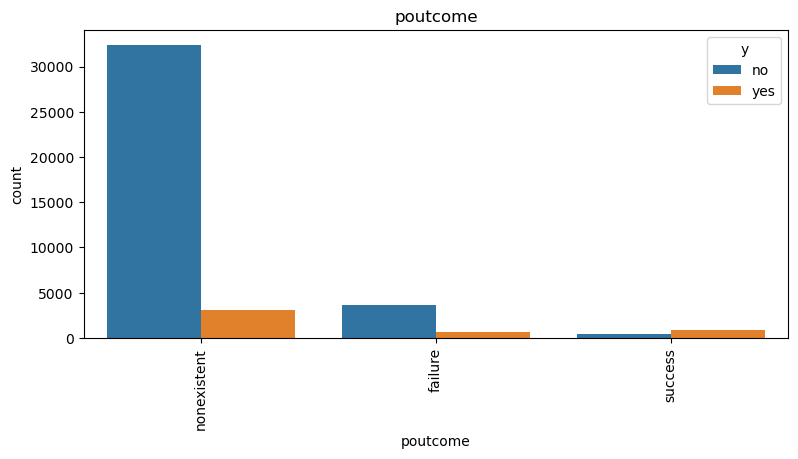

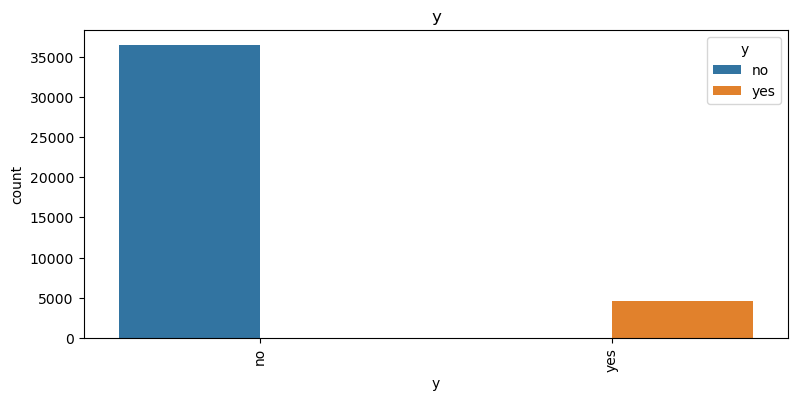

In [25]:
# running a bivariate analysis on the categorical data for understanding impact on outcome 
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=df[column],hue=df['y'],data=df)
    plt.title(column)    
    plt.xticks(rotation=90)

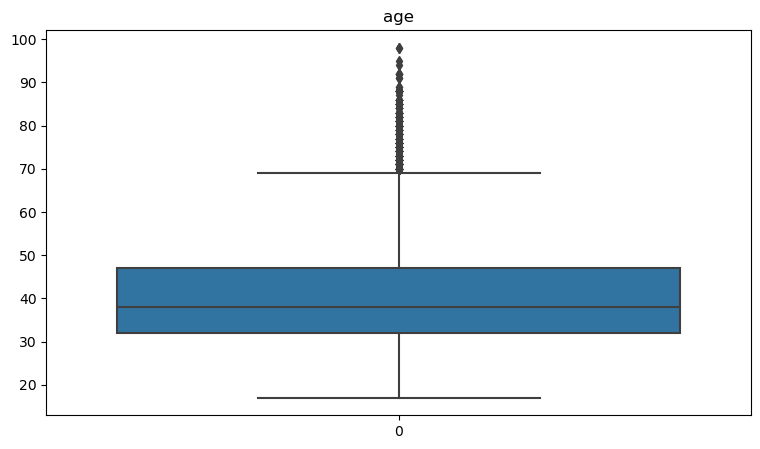

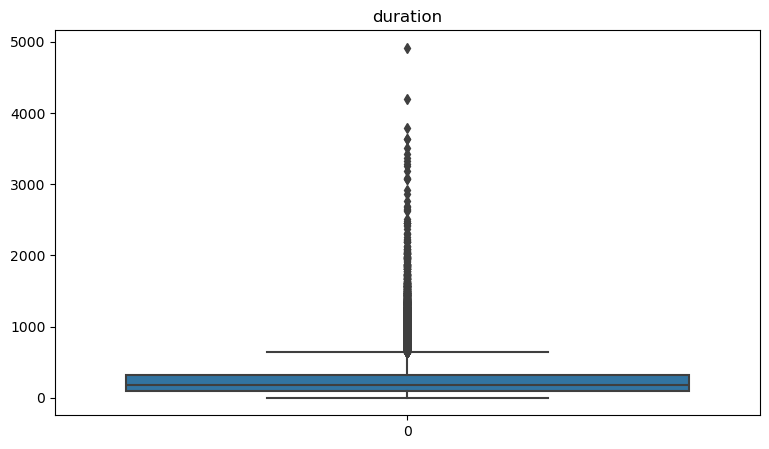

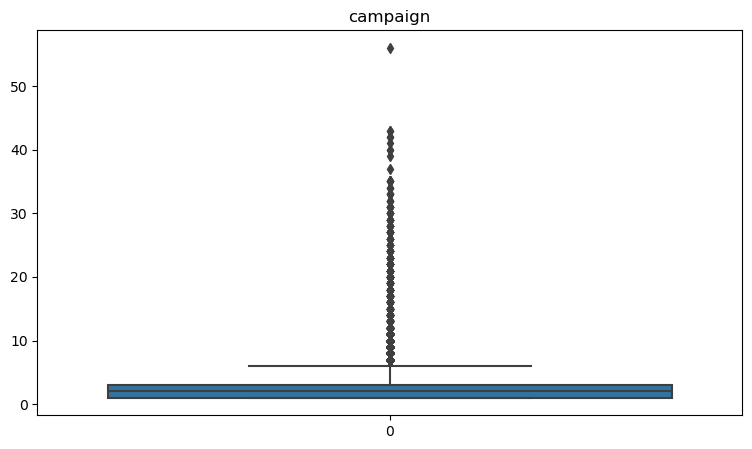

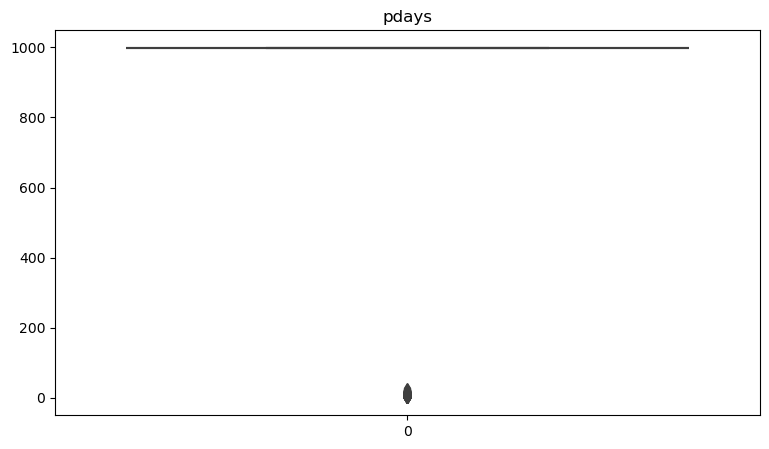

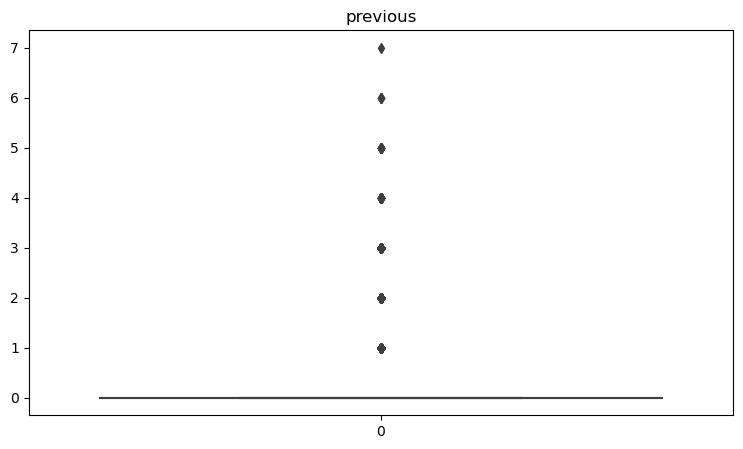

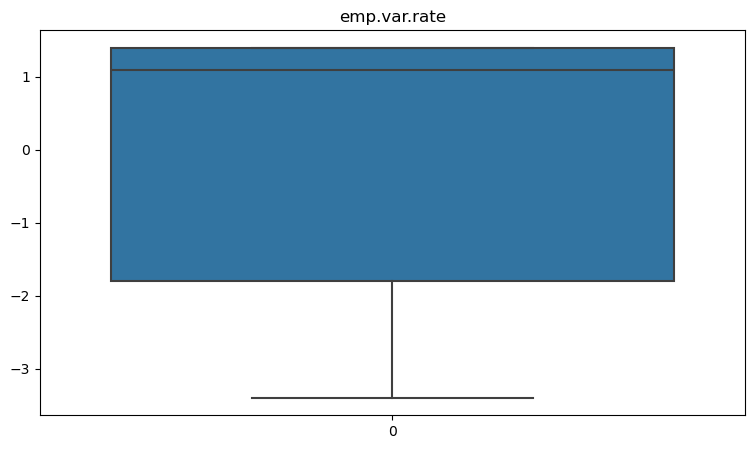

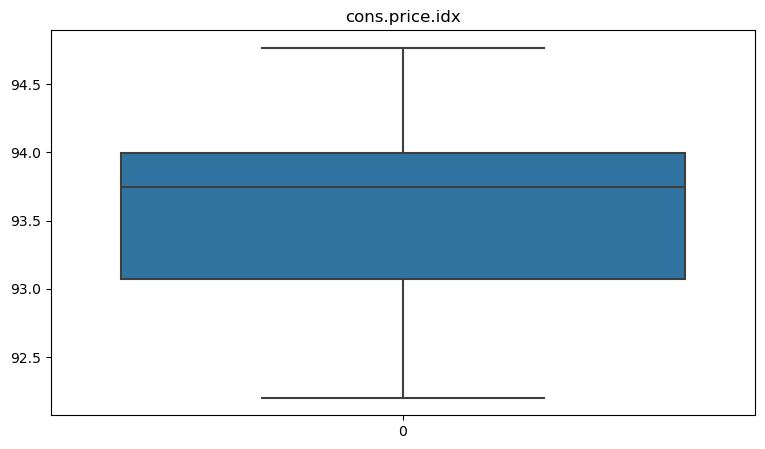

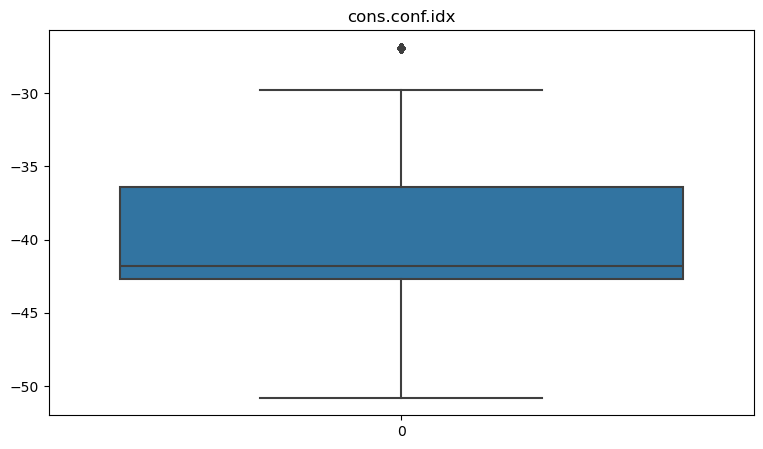

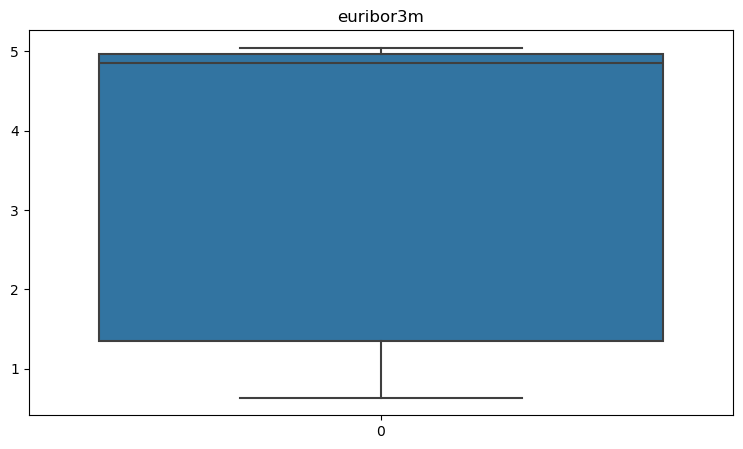

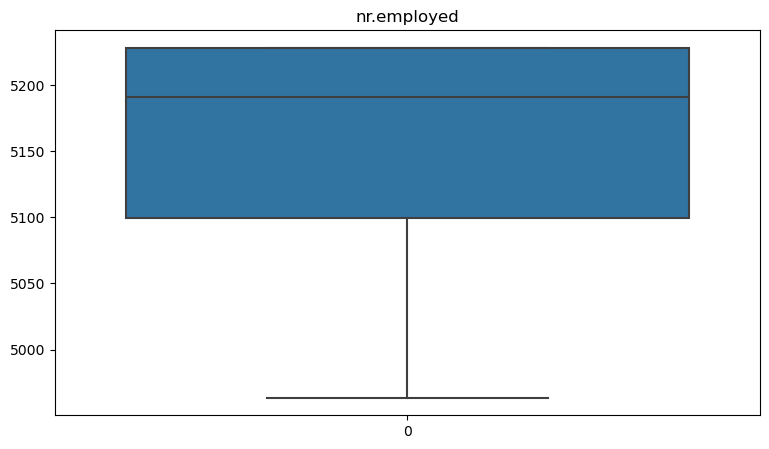

In [26]:
# Analysis on the numberic columns and numeric data 

# select_dtypes selects data with numeric features
numeric_data = df.select_dtypes(include=np.number) 
numeric_col = numeric_data.columns 
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(122)
    sns.boxplot(df[column])
    plt.title(column)

Seems like from the data spread and plots in the dataframe, the pdays and previous consist of a single value and their variance is low. They can be dropped as they do not alter the outcome prediction. 


The customers who have subscribed for the term deposit seem to be :
1. Having administrative jobs form the majority amongst those who have subscirbed to the term deposit with technicians being the second majority.
2. Married
3. Have a university degree
4. They do not hold a credit in default
5. Have cell phone as preference for communication

The numberical univariate analysis also shows that the features age, duration and campaign are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.

In [29]:
# Drop the pdays and previous columns from the dataframe 
df.drop(['pdays', 'previous'], axis=1, inplace=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [31]:
# As we have 78 different values for age, writing a function to categorize them based on the spread on the graphs above
def categorize_age(df):
    df.loc[df['age'] <= 32, 'age'] = 1
    df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
    df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
    df.loc[(df['age'] > 70) & (df['age'] <= 98), 'age'] = 4
           
    return df

categorize_age(df);
print(df.head())

   age        job  marital    education default housing loan    contact month  \
0    3  housemaid  married     basic.4y      no      no   no  telephone   may   
1    3   services  married  high.school      no      no   no  telephone   may   
2    2   services  married  high.school      no     yes   no  telephone   may   
3    2     admin.  married     basic.6y      no      no   no  telephone   may   
4    3   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  duration  campaign     poutcome  emp.var.rate  cons.price.idx  \
0         mon       261         1  nonexistent           1.1          93.994   
1         mon       149         1  nonexistent           1.1          93.994   
2         mon       226         1  nonexistent           1.1          93.994   
3         mon       151         1  nonexistent           1.1          93.994   
4         mon       307         1  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.

In [32]:
def categorize_duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration']    = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration']   = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df
categorize_duration(df);
print(df.head())

   age        job  marital    education default housing loan    contact month  \
0    3  housemaid  married     basic.4y      no      no   no  telephone   may   
1    3   services  married  high.school      no      no   no  telephone   may   
2    2   services  married  high.school      no     yes   no  telephone   may   
3    2     admin.  married     basic.6y      no      no   no  telephone   may   
4    3   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  duration  campaign     poutcome  emp.var.rate  cons.price.idx  \
0         mon         3         1  nonexistent           1.1          93.994   
1         mon         2         1  nonexistent           1.1          93.994   
2         mon         3         1  nonexistent           1.1          93.994   
3         mon         2         1  nonexistent           1.1          93.994   
4         mon         3         1  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.

In [33]:
# USe Label encoder to treat the following categorical columns 
# Jobs, Marital, Education, Default, Housing, Loan, Contact, Month, Day of Week
labelencoder_X = LabelEncoder()
df['job']      = labelencoder_X.fit_transform(df['job']) 
df['marital']  = labelencoder_X.fit_transform(df['marital']) 
df['education']= labelencoder_X.fit_transform(df['education']) 
df['default']  = labelencoder_X.fit_transform(df['default']) 
df['housing']  = labelencoder_X.fit_transform(df['housing']) 
df['loan']     = labelencoder_X.fit_transform(df['loan']) 
df['contact']  = labelencoder_X.fit_transform(df['contact']) 
df['month']    = labelencoder_X.fit_transform(df['month']) 
df['day_of_week'] = labelencoder_X.fit_transform(df['day_of_week']) 
df['poutcome'] = labelencoder_X.fit_transform(df['poutcome']) 
df['y'] = labelencoder_X.fit_transform(df['y']) 
print(df.head())
print(df.tail())

   age  job  marital  education  default  housing  loan  contact  month  \
0    3    3        1          0        0        0     0        1      6   
1    3    7        1          3        0        0     0        1      6   
2    2    7        1          3        0        1     0        1      6   
3    2    0        1          1        0        0     0        1      6   
4    3    7        1          3        0        0     1        1      6   

   day_of_week  duration  campaign  poutcome  emp.var.rate  cons.price.idx  \
0            1         3         1         1           1.1          93.994   
1            1         2         1         1           1.1          93.994   
2            1         3         1         1           1.1          93.994   
3            1         2         1         1           1.1          93.994   
4            1         3         1         1           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  
0          -36.4      4.857       

In [34]:
df.shape

(41188, 19)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [36]:
# Predictors
X = df.iloc[:,:-1]

# Target
y = df.iloc[:,-1]

# Dividing the data into train and test subsets
# We have the 80/20 train vs test split with random sampling
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [38]:
# Generate the baseline score from the data
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print(baseline_score)

0.8873512988589464


#### Baseline for Classifier
The baseline score for the classifier was obtained by using the `DummyClassifier` with the training data. The score to meet or exceed is 88.7%

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [41]:
# Initialize classifiers
logreg = LogisticRegression()

# Define hyperparameter grids for grid search
param_grid_logreg = {}

# Perform grid search
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')

# Fit models
grid_logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=5, estimator=LogisticRegression(), param_grid={},
             scoring='accuracy')

### Problem 9: Score the Model

What is the accuracy of your model?

In [43]:
# Scoring based on train, test, time, precision, recall and F1 Score
y_test_predictions_logreg = grid_logreg.predict(X_test)
precision_logreg, recall_logreg, f1score_logreg, _ = score(y_test, y_test_predictions_logreg, average='weighted')
LOGCV  = round(accuracy_score(y_test, y_test_predictions_logreg), 2) * 100

# Evaluate models
results_df = pd.DataFrame({
    'model': ['Logistic Regression'],
    'train score': [grid_logreg.best_score_],
    'test score': [grid_logreg.score(X_test, y_test)],
    'average fit time': [grid_logreg.cv_results_['mean_fit_time'].mean()],
    'precision' : [precision_logreg],
    'Recall' : [recall_logreg],
    'F1 Score' : [f1score_logreg],
    'Accuracy Score' : [LOGCV]
})

# Generate a dataframe for the classifier models
results_df.set_index('model', inplace=True)
print(results_df)

                     train score  test score  average fit time  precision  \
model                                                                       
Logistic Regression     0.903992    0.906045           0.13493   0.892132   

                       Recall  F1 Score  Accuracy Score  
model                                                    
Logistic Regression  0.906045  0.893381            91.0  


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [45]:
# Initialize classifiers
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC(probability=True)
dtree = DecisionTreeClassifier()

param_grid_dtree = {}
param_grid_logreg = {}
param_grid_knn = {}
param_grid_svc = {}

# Perform grid search
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_dtree  = GridSearchCV(dtree, param_grid_dtree)

# fit the model
grid_logreg.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)
grid_svc.fit(X_train, y_train)
grid_dtree.fit(X_train, y_train)

# Look at the prediction results for caliberation
y_test_predictions_logreg = grid_logreg.predict(X_test)
precision_logreg, recall_logreg, f1score_logreg, _ = score(y_test, y_test_predictions_logreg, average='weighted')
y_test_predictions_knn = grid_knn.predict(X_test)
precision_knn, recall_knn, f1score_knn, _ = score(y_test, y_test_predictions_knn, average='weighted')
y_test_predictions_svc = grid_svc.predict(X_test)
precision_svc, recall_svc, f1score_svc, _ = score(y_test, y_test_predictions_svc, average='weighted')
y_test_predictions_dtree = grid_dtree.predict(X_test)
precision_dtree, recall_dtree, f1score_dtree, _ = score(y_test, y_test_predictions_dtree, average='weighted')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [46]:
# Evaluate models

## Using the cross_val_score option from sklearn - this is taking time as it runs KFOLD
#k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
#LOGCV  = (cross_val_score(grid_logreg, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
#KNNCV = (cross_val_score(grid_knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
#SVMCV = (cross_val_score(grid_svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
#DTCV  = (cross_val_score(grid_dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

## Using the Accuracy_score option from sklearn 
LOGCV  = round(accuracy_score(y_test, y_test_predictions_logreg), 2) * 100
KNNCV  = round(accuracy_score(y_test, y_test_predictions_knn), 2) * 100
SVMCV  = round(accuracy_score(y_test, y_test_predictions_svc), 2) * 100
DTCV   = round(accuracy_score(y_test, y_test_predictions_dtree), 2) * 100

#print("__________________________________________________________________")
#print(f"Accuracy score for Logistic regression: {round(accuracy_score(y_test, y_test_predictions_logreg), 2) * 100}%")
#print(f"Accuracy score for KNN: {round(accuracy_score(y_test, y_test_predictions_knn), 2) * 100}%")
#print(f"Accuracy score for SVM: {round(accuracy_score(y_test, y_test_predictions_svc), 2) * 100}%")
#print(f"Accuracy score for DTREE: {round(accuracy_score(y_test, y_test_predictions_dtree), 2) * 100}%")
#print("__________________________________________________________________")

results_df = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree'],
    'train score': [grid_logreg.best_score_, grid_knn.best_score_, grid_svc.best_score_, grid_dtree.best_score_],
    'test score': [grid_logreg.score(X_test, y_test), grid_knn.score(X_test, y_test), grid_svc.score(X_test, y_test), grid_dtree.score(X_test, y_test)],
    'average fit time': [grid_logreg.cv_results_['mean_fit_time'].mean(),
                         grid_knn.cv_results_['mean_fit_time'].mean(),
                         grid_svc.cv_results_['mean_fit_time'].mean(), 
                         grid_dtree.cv_results_['mean_fit_time'].mean()],
    'precision' : [precision_logreg, precision_knn, precision_svc, precision_dtree],
    'Recall' : [recall_logreg, recall_knn, recall_svc, recall_dtree],
    'F1 Score' : [f1score_logreg, f1score_knn, f1score_svc, f1score_dtree],
    'Accuracy Score' : [LOGCV, KNNCV, SVMCV, DTCV]
})

# Generate a dataframe for the classifier models
results_df.set_index('model', inplace=True)
print("__________________________________________________________________")
print(results_df)
print("__________________________________________________________________")


__________________________________________________________________
                     train score  test score  average fit time  precision  \
model                                                                       
Logistic Regression     0.903992    0.906045          0.135651   0.892132   
KNN                     0.897125    0.899733          0.010648   0.887341   
SVC                     0.887343    0.887351         27.573467   0.787392   
Decision Tree           0.881794    0.885571          0.057167   0.885715   

                       Recall  F1 Score  Accuracy Score  
model                                                    
Logistic Regression  0.906045  0.893381            91.0  
KNN                  0.899733  0.891239            90.0  
SVC                  0.887351  0.834389            89.0  
Decision Tree        0.885571  0.885643            89.0  
__________________________________________________________________


Confusion matrix for Logistic Regression:
[[10704   261]
 [  900   492]]
Confusion matrix for K-Nearest Neighbors:
[[10567   398]
 [  841   551]]
Confusion matrix for Support Vector Machine:
[[10965     0]
 [ 1392     0]]
Confusion matrix for Decision Tree:
[[10256   709]
 [  705   687]]


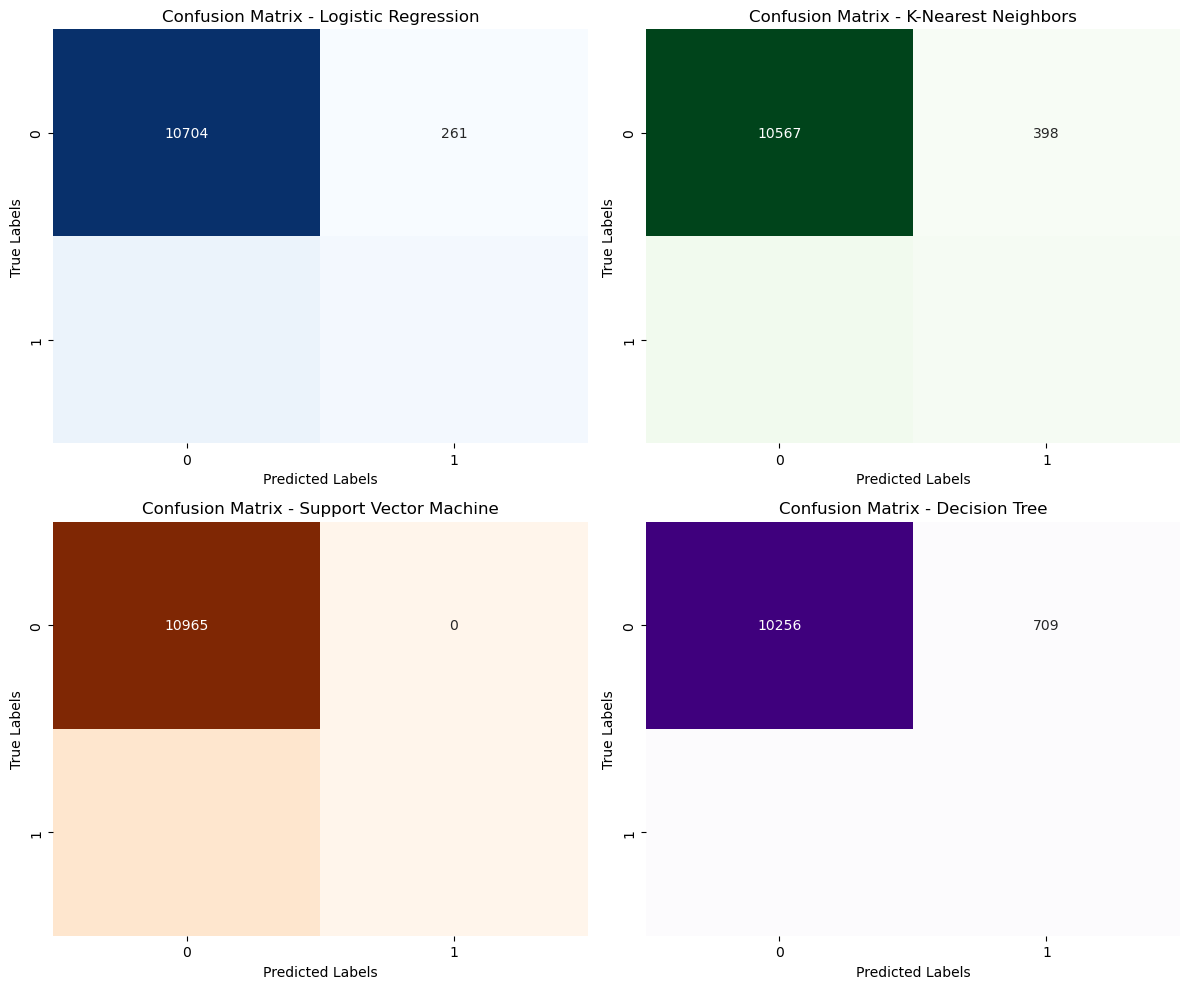

In [47]:
# Compute confusion matrix
cm_logreg = confusion_matrix(y_test, y_test_predictions_logreg)
print("Confusion matrix for Logistic Regression:")
print(cm_logreg)

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_test_predictions_knn)
print("Confusion matrix for K-Nearest Neighbors:")
print(cm_knn)

# Compute confusion matrix
cm_svc = confusion_matrix(y_test, y_test_predictions_svc)
print("Confusion matrix for Support Vector Machine:")
print(cm_svc)

# Compute confusion matrix
cm_dtree = confusion_matrix(y_test, y_test_predictions_dtree)
print("Confusion matrix for Decision Tree:")
print(cm_dtree)

# Plot the confusion matrix
# ------------------------------------------------
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot the confusion matrix for Logistic Regression
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix - Logistic Regression")
axes[0, 0].set_xlabel("Predicted Labels")
axes[0, 0].set_ylabel("True Labels")

# Plot the confusion matrix for K-Nearest Neighbors
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", cbar=False, ax=axes[0, 1])
axes[0, 1].set_title("Confusion Matrix - K-Nearest Neighbors")
axes[0, 1].set_xlabel("Predicted Labels")
axes[0, 1].set_ylabel("True Labels")

# Plot the confusion matrix for Support Vector Machine
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Oranges", cbar=False, ax=axes[1, 0])
axes[1, 0].set_title("Confusion Matrix - Support Vector Machine")
axes[1, 0].set_xlabel("Predicted Labels")
axes[1, 0].set_ylabel("True Labels")

# Plot the confusion matrix for Decision Tree
sns.heatmap(cm_dtree, annot=True, fmt="d", cmap="Purples", cbar=False, ax=axes[1, 1])
axes[1, 1].set_title("Confusion Matrix - Decision Tree")
axes[1, 1].set_xlabel("Predicted Labels")
axes[1, 1].set_ylabel("True Labels")

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

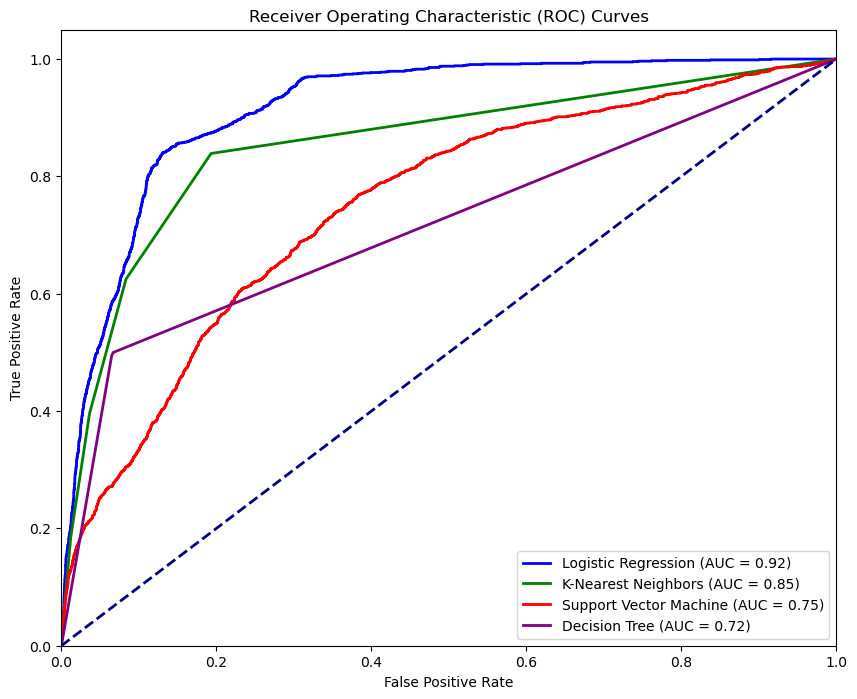

In [48]:
# Plotting the ROC under the curve for the various models 

# ROC: Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test
# The Higher the area under the curve the better the model is .. 

# Logistic Regression
probs_logreg = grid_logreg.predict_proba(X_test)
preds_logreg = probs_logreg[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, preds_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# K-Nearest Neighbors
probs_knn = grid_knn.predict_proba(X_test)
preds_knn = probs_knn[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, preds_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Support Vector Machine
probs_svc = grid_svc.predict_proba(X_test)
preds_svc = probs_svc[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, preds_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Decision Tree
probs_dtree = grid_dtree.predict_proba(X_test)
preds_dtree = probs_dtree[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, preds_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='K-Nearest Neighbors (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svc, tpr_svc, color='red', lw=2, label='Support Vector Machine (AUC = %0.2f)' % roc_auc_svc)
plt.plot(fpr_dtree, tpr_dtree, color='purple', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dtree)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [50]:
# Hyper parameter tuning for our models to see if it improves the performance as needed 
# Initialize classifiers
logreg_t = LogisticRegression()
knn_t = KNeighborsClassifier()
svc_t = SVC(probability=True)
dtree_t = DecisionTreeClassifier(criterion='gini')

# Hyperparameter tuning (use GridSearchCV)
param_grid_dtree = {
    'min_impurity_decrease': [0.01, 0.02],
    'max_depth': [2, 5],
    'min_samples_split': [0.1, 0.2]
}

param_grid_logreg = {
    'C': [0.1, 1, 10]
}

param_grid_knn = {
    'n_neighbors': [1, 3, 5]
}

param_grid_svc = {
    'gamma': [0.1, 1.0, 10.0],
    'kernel': ['sigmoid']
}


# Perform grid search
grid_logreg_t = GridSearchCV(logreg_t, param_grid_logreg, cv=5, scoring='accuracy')
grid_knn_t = GridSearchCV(knn_t, param_grid_knn, cv=5, scoring='accuracy')
grid_svc_t = GridSearchCV(svc_t, param_grid_svc, cv=5, scoring='accuracy')
grid_dtree_t  = GridSearchCV(dtree_t, param_grid_dtree)

# fit the model
grid_logreg_t.fit(X_train, y_train)
grid_knn_t.fit(X_train, y_train)
grid_svc_t.fit(X_train, y_train)
grid_dtree_t.fit(X_train, y_train)

y_test_predictions_logreg_t = grid_logreg_t.predict(X_test)
precision_logreg, recall_logreg, f1score_logreg, _ = score(y_test, y_test_predictions_logreg_t, average='weighted')
y_test_predictions_knn_t = grid_knn_t.predict(X_test)
precision_knn, recall_knn, f1score_knn, _ = score(y_test, y_test_predictions_knn_t, average='weighted')
y_test_predictions_svc_t = grid_svc_t.predict(X_test)
precision_svc, recall_svc, f1score_svc, _ = score(y_test, y_test_predictions_svc_t, average='weighted')
y_test_predictions_dtree_t = grid_dtree_t.predict(X_test)
precision_dtree, recall_dtree, f1score_dtree, _ = score(y_test, y_test_predictions_dtree_t, average='weighted')


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [79]:
# Evaluate models

## Using the Accuracy_score option from sklearn 
LOGCV  = round(accuracy_score(y_test, y_test_predictions_logreg_t), 2) * 100
KNNCV  = round(accuracy_score(y_test, y_test_predictions_knn_t), 2) * 100
SVMCV  = round(accuracy_score(y_test, y_test_predictions_svc_t), 2) * 100
DTCV   = round(accuracy_score(y_test, y_test_predictions_dtree_t), 2) * 100

results_df = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree'],
    'train score': [grid_logreg_t.best_score_, grid_knn_t.best_score_, grid_svc_t.best_score_, grid_dtree_t.best_score_],
    'test score': [grid_logreg_t.score(X_test, y_test), grid_knn_t.score(X_test, y_test), grid_svc_t.score(X_test, y_test), grid_dtree_t.score(X_test, y_test)],
    'average fit time': [grid_logreg_t.cv_results_['mean_fit_time'].mean(),
                         grid_knn_t.cv_results_['mean_fit_time'].mean(),
                         grid_svc_t.cv_results_['mean_fit_time'].mean(), 
                         grid_dtree_t.cv_results_['mean_fit_time'].mean()],
    'precision' : [precision_logreg, precision_knn, precision_svc, precision_dtree],
    'Recall' : [recall_logreg, recall_knn, recall_svc, recall_dtree],
    'F1 Score' : [f1score_logreg, f1score_knn, f1score_svc, f1score_dtree],
    'Accuracy Score' : [LOGCV, KNNCV, SVMCV, DTCV]
})

# Generate a dataframe for the classifier models
results_df.set_index('model', inplace=True)
print("__________________________________________________________________")
print(results_df)
print("__________________________________________________________________")


__________________________________________________________________
                     train score  test score  average fit time  precision  \
model                                                                       
Logistic Regression     0.905414    0.906126          0.129607   0.892236   
KNN                     0.897125    0.899733          0.007704   0.887341   
SVC                     0.887343    0.887351         18.820935   0.787392   
Decision Tree           0.899240    0.905317          0.017532   0.892795   

                       Recall  F1 Score  Accuracy Score  
model                                                    
Logistic Regression  0.906126  0.893446            91.0  
KNN                  0.899733  0.891239            90.0  
SVC                  0.887351  0.834389            89.0  
Decision Tree        0.905317  0.895634            91.0  
__________________________________________________________________


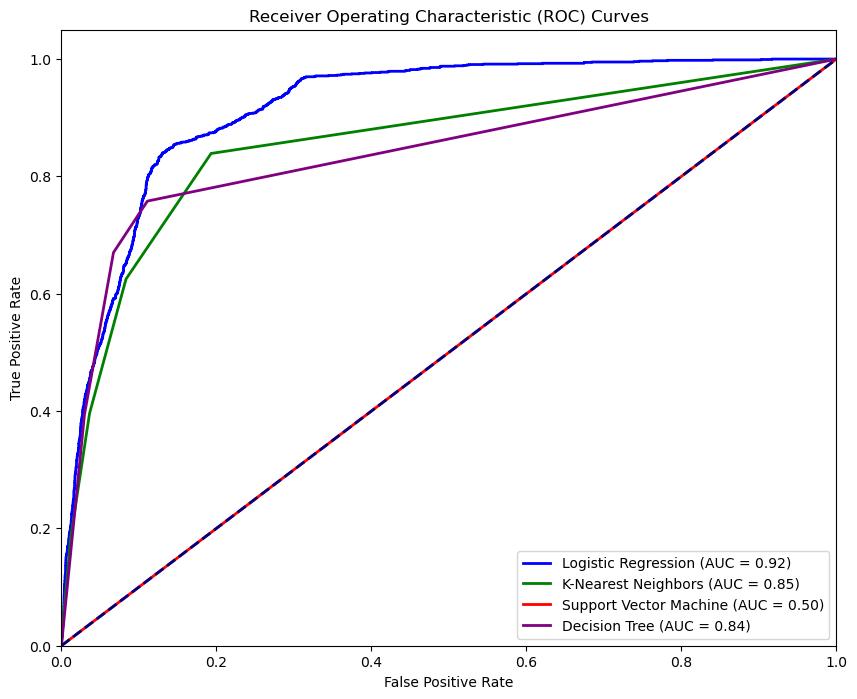

In [81]:
# Plotting the ROC under the curve for the various models 

# ROC: Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test
# The Higher the area under the curve the better the model is .. 

# Logistic Regression
probs_logreg = grid_logreg_t.predict_proba(X_test)
preds_logreg = probs_logreg[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, preds_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# K-Nearest Neighbors
probs_knn = grid_knn_t.predict_proba(X_test)
preds_knn = probs_knn[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, preds_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Support Vector Machine
probs_svc = grid_svc_t.predict_proba(X_test)
preds_svc = probs_svc[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, preds_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Decision Tree
probs_dtree = grid_dtree_t.predict_proba(X_test)
preds_dtree = probs_dtree[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, preds_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='K-Nearest Neighbors (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svc, tpr_svc, color='red', lw=2, label='Support Vector Machine (AUC = %0.2f)' % roc_auc_svc)
plt.plot(fpr_dtree, tpr_dtree, color='purple', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dtree)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


# Bank Marketing & Classification Models

## Objective:
The goal of this project is to compare the performance of four classifiers—K Nearest Neighbor (KNN), Logistic Regression, Decision Trees, and Support Vector Machines (SVM)—using a dataset related to marketing bank products over the telephone. The dataset is sourced from the UCI Machine Learning repository and pertains to direct marketing campaigns conducted by a Portuguese banking institution.

## Data Overview:
* **Source:** UCI Machine Learning repository
* **Period:** May 2008 to November 2010
* **Total Contacts:** 79,354
* **Successes:** 6,499 (8% success rate)

## Attributes:
Various features related to customer demographics and campaign details
* **Class Imbalance:** Approximately 90:10 split between the two classes (success vs. no success)

## Key Insights:
* **Customer Demographics:**
  * Top professions: Administration, blue-collar jobs, and technicians
  * Majority are married
  * Most do not have a default
  * Many have housing loans, few have personal loans
  * Preferred contact method: Cell phone
  * High contact frequency in May and preference for Thursday

## Data Characteristics:
* No missing values, but some categorical data needs encoding
* Class imbalance needs addressing to avoid bias
* Features like `pdays` and `previous` have low variance and can be dropped
* Skewed features: Age, duration, and campaign due to outliers

## Methodology:
Following the CRISP-DM framework:
* **Business Understanding:** Define objectives and requirements
* **Data Understanding:** Collect initial data, describe data, explore data, verify data quality
* **Data Preparation:** Clean data, handle class imbalance, encode categorical variables, drop low-variance features, remove outliers
* **Modeling:** Apply classifiers (KNN, Logistic Regression, Decision Trees, SVM) and perform hyperparameter tuning using GridSearchCV
* **Evaluation:** Compare model performance using metrics like train score, test score, precision, recall, F1 score, and accuracy

## Feature Selection:
* **Age:**
  * Coefficient of Variation: High, with a mean close to 40 years.
  * Correlation with Outcome: No clear conclusion yet. It might be useful to perform further statistical tests or visualizations (e.g., scatter plots, correlation matrices) to determine if there’s a significant relationship between age and the outcome.

* **Duration:**
  * Coefficient of Variation: High, with a mean close to 258.3.
  * Correlation with Outcome: Shows correlation, but needs verification. Duration often correlates with the outcome in marketing datasets because longer calls might indicate more engaged customers. You could use techniques like logistic regression coefficients or feature importance from tree-based models to verify this correlation.

* **Default:** No significant correlation with the outcome (Y).
* **Loan:** No significant correlation with the outcome (Y).
* **Housing:** While not directly correlated with the outcome, it shows a higher probability of occurrence among the dataset.
* `pdays` and `previous` consist of a single value and their variance is low. They can be dropped as they do not alter the outcome prediction.

## Outlier Analysis:
* Heuristically fixing the "age" and "duration" outliers as well as label encoding all the categorical variables as needed.
* Using standard scaler for the encoding to mitigate high variance

## Test-Train Split:
* Used a 70/30 randomized test-train split with the stratification on classes to account for the "y" outcomes

## Performance Comparison:
* **Baseline Score:** Generated using a Dummy Classifier
  * Was around 89% on the training set

**Model scores with default setting**

* **Logistic Regression**: Best overall with the highest accuracy (91%) and good balance of precision and recall.
* **K-Nearest Neighbors (KNN)**: Also strong with 90% accuracy and very fast to train.
* **Support Vector Classifier (SVC)**: Decent accuracy (89%) but takes a long time to train.
* **Decision Tree**: Balanced performance with 89% accuracy and moderate training time.

**Inference:** Logistic Regression is the top choice for accuracy, while KNN is great for quick training. This was also validated with the ROC analysis.


**Model Scores After Hyperparameter Tuning:**
* **Logistic Regression**: Train score 0.905, Test score 0.906, Precision 0.892, Recall 0.906, F1 Score 0.893, Accuracy 91.0%
* **K-Nearest Neighbors (KNN)**: Train score 0.897, Test score 0.900, Precision 0.887, Recall 0.900, F1 Score 0.891, Accuracy 90.0%
* **Support Vector Classifier (SVC)**: Train score 0.887, Test score 0.887, Precision 0.787, Recall 0.887, F1 Score 0.834, Accuracy 89.0%
* **Decision Tree**: Train score 0.899, Test score 0.905, Precision 0.893, Recall 0.905, F1 Score 0.896, Accuracy 91.0%

**Conclusion**

After removing outliers and performing hyperparameter tuning, both Logistic Regression and Decision Trees showed the highest accuracy at 91.0%. Logistic Regression remains a strong performer with balanced precision and recall, while Decision Trees also demonstrated robust performance.

In [89]:
# creating a new test data frame and checking the prediction with Logistic regression 
# Creating a new test DataFrame with modified values
test_data = {
    'age': [4, 4, 3, 3, 4],
    'job': [4, 8, 8, 1, 8],
    'marital': [2, 2, 2, 2, 2],
    'education': [1, 4, 4, 2, 4],
    'default': [1, 1, 1, 1, 1],
    'housing': [1, 1, 2, 1, 1],
    'loan': [1, 1, 1, 1, 2],
    'contact': [2, 2, 2, 2, 2],
    'month': [7, 7, 7, 7, 7],
    'day_of_week': [2, 2, 2, 2, 2],
    'duration': [4, 3, 4, 3, 4],
    'campaign': [2, 2, 2, 2, 2],
    'poutcome': [2, 2, 2, 2, 2],
    'emp.var.rate': [1.2, 1.2, 1.2, 1.2, 1.2],
    'cons.price.idx': [94.0, 94.0, 94.0, 94.0, 94.0],
    'cons.conf.idx': [-36.0, -36.0, -36.0, -36.0, -36.0],
    'euribor3m': [4.9, 4.9, 4.9, 4.9, 4.9],
    'nr.employed': [5192.0, 5192.0, 5192.0, 5192.0, 5192.0]
}
test_df = pd.DataFrame(test_data)
print(test_df)

# Predict the outcome using logistic regression
y_lr = grid_logreg_t.predict(test_df)
print(y_mp)

# predict the outcome using Decision tree 
y_dt = grid_dtree_t.predict(test_df)
print(y_dt)


   age  job  marital  education  default  housing  loan  contact  month  \
0    4    4        2          1        1        1     1        2      7   
1    4    8        2          4        1        1     1        2      7   
2    3    8        2          4        1        2     1        2      7   
3    3    1        2          2        1        1     1        2      7   
4    4    8        2          4        1        1     2        2      7   

   day_of_week  duration  campaign  poutcome  emp.var.rate  cons.price.idx  \
0            2         4         2         2           1.2            94.0   
1            2         3         2         2           1.2            94.0   
2            2         4         2         2           1.2            94.0   
3            2         3         2         2           1.2            94.0   
4            2         4         2         2           1.2            94.0   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.0        4.9       519